# Problem 1. 

Please implement an edge detector using the discrete Laplacian operator as presented in slide 18 of Lecture 04. From the Internet, download an image of a cat and produce an image of edges.

# Problem 1a with tensorflow functions

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
#define laplacian operator
W = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

In [3]:
W #show operator

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

In [5]:
#import packages to read image
import cv2
import sys
import time
from matplotlib import pyplot as plt

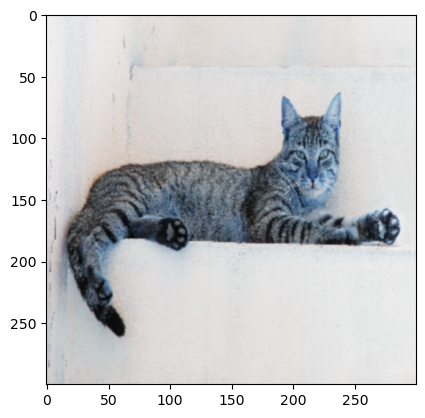

In [62]:
#read image of cat
img = cv2.imread('Cat2.jpeg')
#resize image
imgResized = cv2.resize(img, (300,300))
#show the image
plt.imshow(imgResized, interpolation = 'bicubic')
plt.show()

In [78]:
#view immage dimensions
dimensions = imgResized.shape 
height = imgResized.shape[0]   # Height is at index 0  
width = imgResized.shape[1]    # Width is at index 1   
#channels = imgResized.shape[2] # no. of channels is at index 2

print('Image Dimension    : ',dimensions)
print('Image Width        : ',width)
print('Image Height       : ',height)
#print('Number of Channels : ',channels)

Image Dimension    :  (300, 300, 3)
Image Width        :  300
Image Height       :  300


In [67]:
#reshape image for convolution
img1 = np.expand_dims(imgResized, 0)

In [68]:
img1.shape

(1, 300, 300, 3)

In [58]:
#reshape filter for convolution
w1 = np.expand_dims(W, -1)
w1 = np.expand_dims(w1, 0)

In [64]:
w1.shape #show shape

(1, 3, 3, 1)

In [69]:
#create input and filter tensors
t1 = tf.constant(img1, dtype=tf.float32)
w = tf.constant(w1, dtype=tf.float32)

In [70]:
#forward pass convolution of filter with image
img_conv = tf.nn.conv2d(t1, w, strides=1, padding='VALID')

In [72]:
#view output shape
img_conv.shape

TensorShape([1, 300, 298, 1])

In [75]:
#return image to original shape
imgc = np.squeeze(img_conv)

In [76]:
imgc.shape

(300, 298)

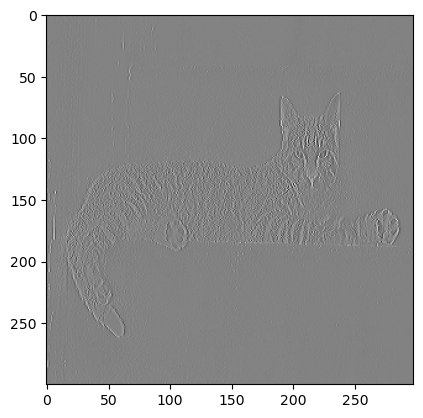

In [129]:
#show the image
plt.imshow(imgc, cmap='gray_r')
plt.show()

In [118]:
#show image with black background
imgc1 = np.maximum(0,imgc)

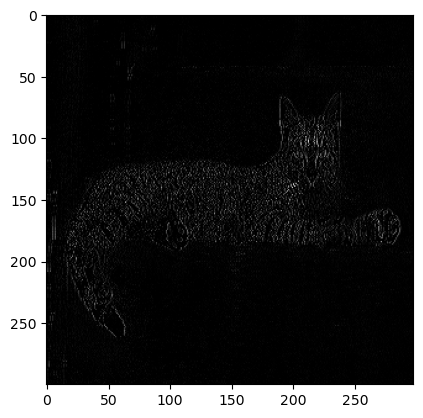

In [128]:
plt.imshow(imgc1, cmap='gray')

# Problem 1.b - with numpy 

In [82]:
#read image of cat as grayscale
img_g = cv2.imread('Cat2.jpeg',0)
#resize image
img_g = cv2.resize(img_g, (300,300))

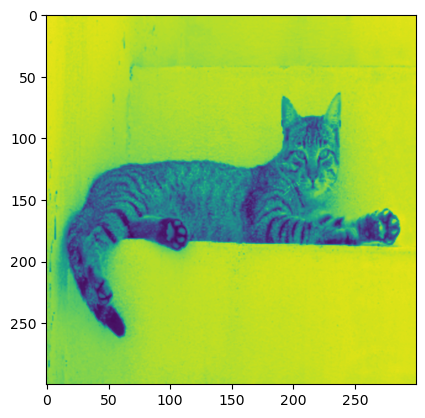

In [96]:
#show the image
plt.imshow(img_g, interpolation = 'bicubic')
plt.show()

In [83]:
img_g.shape

(300, 300)

In [84]:
W.shape

(3, 3)

In [94]:
#convolve image with laplace operator using elementwise multiplication

y = np.zeros((298,298))
for i in range(img_g.shape[0]-2):
    for j in range(img_g.shape[1]-2):
        y[i,j] = np.sum(np.multiply(img_g[i:i+3,j:j+3],W))
        
    

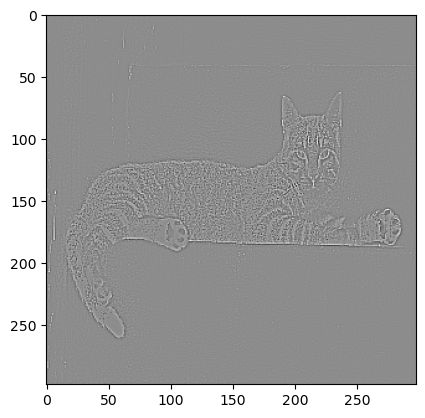

In [132]:
#show the image
plt.imshow(y, cmap='gray_r')
plt.show()

# Problem 2. 

Modify kernel size in the second convolutional layer in the Small CNN for Classification of MNIST Images as defined on slide 49 of the latest version of the lecture notes. Let the second and the third Convolution layers use kernel size of (4,4). For the first layer keep kernel size of (3,3). Print the summary of your model. Please provide detailed explanation (calculation) for all numbers of trainable parameters

In [97]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [98]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [100]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [102]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3, 3),activation='relu',input_shape=(28, 28, 1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4), activation='relu'))

In [103]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          65600     
                                                                 
Total params: 98,752
Trainable params: 98,752
Non-traina

## Trainable parameter calculations

conv2d: (3*3)*32 + 32 = 320 kernal dimension * 32 filters +32 bias parameters 

conv2d_1: 64*32*16 + 64 = 32832 kernal dimensions * 64 filters * 32 previous layer filters + 64 bias parameters

conv2d_2: 64*64*16 + 64 = 65600 kernal dimensions * 64 filters * 64 previous layer filters + 64 bias parameters

# Problem 3. 

change the size of the kernel on the first convolutional layer from 3x3 to 4x4, 5x5 and 6x6. Again, record and report the accuracy for different filter sizes. Plot evolution of accuracy with epoch. Select the best model

## Kernal = (4,4)

In [303]:
# kernal =(4,4)
from tensorflow.keras import layers
from tensorflow.keras import models

#create model
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [106]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#load mnist data set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#reshape and normalize image set
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
#create image lables as categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [304]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history4 = model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1669 - accuracy: 0.9477
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0451 - accuracy: 0.9862
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0312 - accuracy: 0.9902
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0257 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0201 - accuracy: 0.9935


In [109]:
#evaluate model
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9895


In [110]:
test_acc # kernal = (4,4)

0.9894999861717224

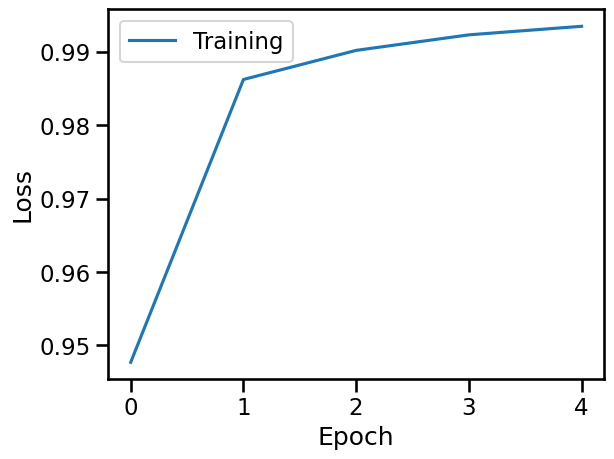

In [306]:
#plot accuracy per epoch
sns.set_context("talk")
plt.plot(history4.history['accuracy'], label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Kernal = (5,5)

In [296]:
# kernal =(5,5)
model5 = models.Sequential()
model5.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(64, activation='relu'))
model5.add(keras.layers.Dense(10, activation='softmax'))

model5.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history5 = model5.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 7s 8ms/step - loss: 0.1667 - accuracy: 0.9474
Epoch 2/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0447 - accuracy: 0.9860
Epoch 3/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 5/5
938/938 [==============================] - 7s 8ms/step - loss: 0.0196 - accuracy: 0.9942


In [192]:
test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0263 - accuracy: 0.9914


In [193]:
test_acc5 # kernal = (5,5)

0.9914000034332275

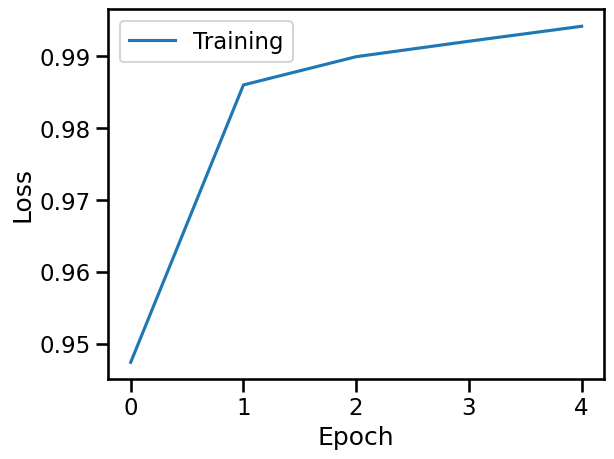

In [307]:
#plot accuracy per epoch
import seaborn as sns
sns.set_context("talk")
plt.plot(history5.history['accuracy'], label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Kernal = (6,6)

In [300]:
# kernal =(6,6)
model = models.Sequential()
model.add(layers.Conv2D(32, (6, 6), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history6 = model.fit(train_images, train_labels, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 7s 7ms/step - loss: 0.1967 - accuracy: 0.9380
Epoch 2/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 3/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0373 - accuracy: 0.9882
Epoch 4/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0293 - accuracy: 0.9907
Epoch 5/5
938/938 [==============================] - 7s 7ms/step - loss: 0.0235 - accuracy: 0.9926


In [115]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0280 - accuracy: 0.9909


In [116]:
test_acc # kernal = (6,6)

0.9908999800682068

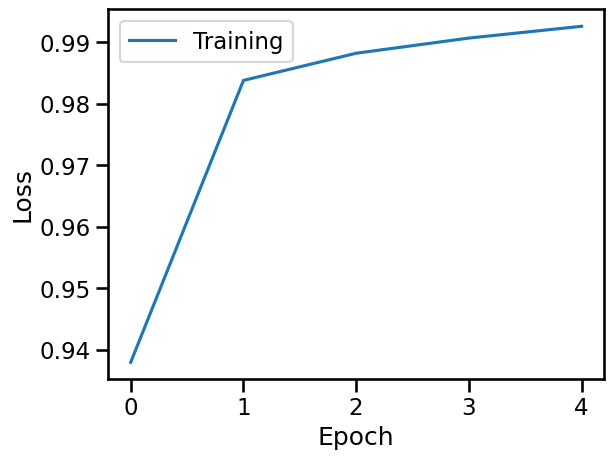

In [308]:
#plot accuracy per epoch
sns.set_context("talk")
plt.plot(history6.history['accuracy'], label="Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

As we see from the results, the model with Kernal set to (5,5) has the best performance of 99.14% test accuracy

# Problem 4. 

Use your own handwriting to create 2 images each of numbers 0, 1,2,3, 4, 5,6,7, and 8. Test the ability of the best model selected in problem 3 to recognize those numbers. Assess the accuracy of the model using just those 18 digits as the test set. Compare with the result of problem 3.

In [287]:
#read in images into array
imglist = []
folder='/Users/mpellegrin008/Documents/VS Code/CSCI89_Deep Learning/CamScanner231006160123456'
i=0
for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), 0) # read the image
        img = cv2.resize(-img, (28, 28), cv2.INTER_CUBIC) # resize the images
        
        cv2.imwrite("pro-img/image_"+str(i)+".png", img) # save the processed images 
        
        imglist.append(img) # append to list
        imgs = np.array(imglist)
        imgs = imgs.astype('float32')
        imgs = imgs/255.0 #normalize images
        i += 1

In [288]:
#check shape of array
imgs.shape

(18, 28, 28)

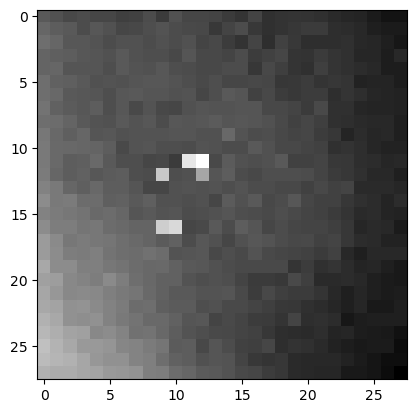

In [295]:
#check image
plt.imshow(imgs[3], cmap='gray')

In [290]:
#reshape array to pass into convolution layer
images_2 = np.expand_dims(imgs, -1)

In [291]:
#check shape of array
images_2.shape

(18, 28, 28, 1)

In [211]:
# create array for labels
correct_vals = np.zeros((18,10))
i=0
for no in [1,1,2,2,0,0,3,3,4,4,5,6,5,6,7,7,8,8]:
        correct_val = np.zeros((10))
        correct_val[no] = 1
        correct_vals[i] = correct_val
        i +=1

In [292]:
#evaluate model
test_loss_own, test_accown = model5.evaluate(images_2, correct_vals)

1/1 [==============================] - 0s 21ms/step - loss: 2.3142 - accuracy: 0.1111


In [286]:
test_accown

0.1111111119389534

As we see above, the accuracy of the model from the previous problem was quite high on the mnist data set at approximately 99.14%.  However, it's accuracy is incredibly low on the handwritten images at approximately 11%.  The reasons for the poor performance of this model on the handwritten data set is likely due to the quality of the handwritten images.  Once the image is reshaped to (28,28) to be fed into the model, the quality drops significantly and it is difficult even for a human to recognize the digits. Furthermore, the handwritten images differ from the mnist data set in that the digits are not centered, however, the translational invariance of convolutional layers should mitigate the effects of that. 